# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia** 

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [ ]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [ ]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [ ]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [ ]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 - Qual é a granularidade da base de dados: mensal
 - Qual é o intervalo de tempo (min/max): 16 anos

### **1.2. Temperatura** 

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [ ]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [ ]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [ ]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [ ]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: diária
 - Qual é o intervalo de tempo (min/max): 900 dias

## 2\. Processamento 

### **2.1. Energia** 

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [12]:
energia = energia.set_index(keys=['referencia'])

 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [ ]:
energia_selecionada = energia['2019':'2020']

In [16]:
energia_selecionada.shape

(24, 3)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura** 

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [17]:
temperatura = temperatura.set_index(keys=['referencia'])

 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [18]:
temperatura_selecionada = temperatura['2019':'2020']

 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [23]:
temperatura_selecionada.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [25]:
temperatura_selecionada.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 643 entries, 2019-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp-media-sp  643 non-null    int64  
 1   temp-media-rj  643 non-null    float64
 2   temp-media-mg  643 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 20.1 KB


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste). 

In [30]:
temperatura_selecionada['temp-media'] = (temperatura_selecionada['temp-media-sp']+
                                       temperatura_selecionada['temp-media-rj']+
                                       temperatura_selecionada['temp-media-mg'])/3

<ipython-input-30-5ea8e8639300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperatura_selecionada['temp-media'] = (temperatura_selecionada['temp-media-sp']+


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação. 

In [31]:
temperatura_resampled = temperatura_selecionada.resample(rule='1m').mean()

In [32]:
temperatura_resampled.shape

(24, 4)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação 

### **3.1. Consumo residencial** 

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

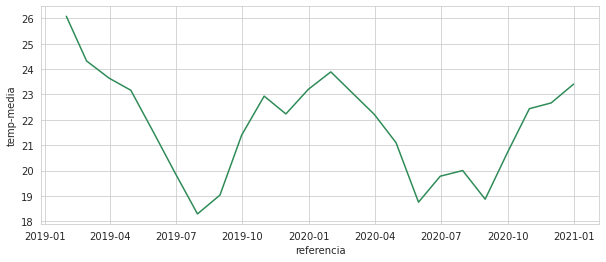

In [37]:
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(data=temperatura_resampled,
                           x='referencia',
                           y='temp-media',
                           color='seagreen')
    grafico.figure.set_size_inches(10, 4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

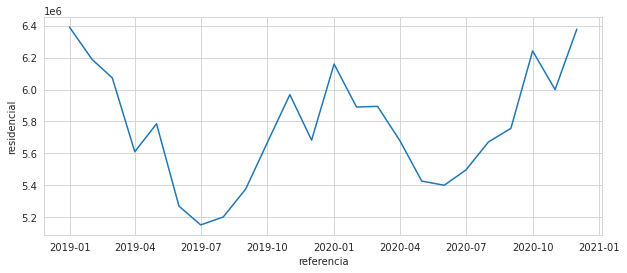

In [40]:
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(data=energia_selecionada,
                           x='referencia',
                           y='residencial')
    grafico.figure.set_size_inches(10, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

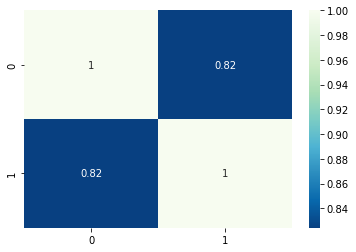

In [44]:
pearson = np.corrcoef(energia_selecionada['residencial'],
            temperatura_resampled['temp-media'])
sns.heatmap(pearson, annot=True, cmap='GnBu_r')

 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** Existe uma forte correlação positiva (r = 0.82) entre o consumo de energia elétrica residencial e a temperatura.

### **3.2. Consumo comercial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

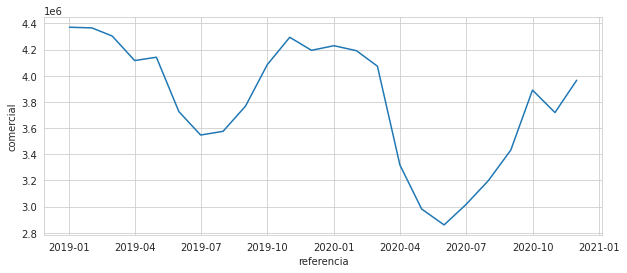

In [46]:
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(data=energia_selecionada,
                           x='referencia',
                           y='comercial')
    grafico.figure.set_size_inches(10, 4)

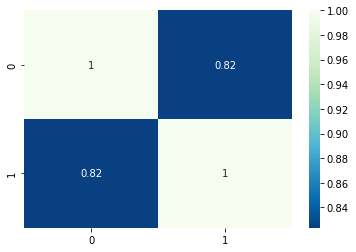

In [47]:
pearson = np.corrcoef(energia_selecionada['comercial'],
            temperatura_resampled['temp-media'])
sns.heatmap(pearson, annot=True, cmap='GnBu_r')

**Resposta:** Existe uma forte correlação positiva (r = 0.82) entre o consumo de energia elétrica residencial e a temperatura.

### **3.3. Consumo industrial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

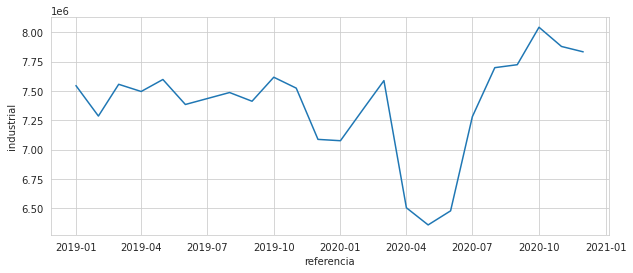

In [51]:
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(data=energia_selecionada,
                           x='referencia',
                           y='industrial')
    grafico.figure.set_size_inches(10, 4)

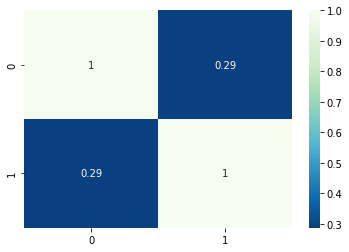

In [52]:
pearson = np.corrcoef(energia_selecionada['industrial'],
            temperatura_resampled['temp-media'])
sns.heatmap(pearson, annot=True, cmap='GnBu_r')

**Resposta:** Existe uma correlação fraca entre o consumo de energia elétrica industrial e a temperatura (r = 0.29). 

---